# Analisi della distribuzione della popolazione residente in Italia

Usiamo i dati dell'ISTAT per costruire la distribuzione dell'età della popolazione italiana.

I dati vanno scaricati dalla [pagina dell'ISTAT](http://dati.istat.it/Index.aspx?DataSetCode=DCIS_POPRES1) con l'opzione "Esporta > Formato di testo (CSV)".

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
df = pd.read_csv('data/DCIS_POPRES1_10042024141101994.csv')

In [24]:
df

,ITTER107,Territorio,TIPO_DATO15,Tipo di indicatore demografico,SEXISTAT1,Sesso,ETA1,Età,STATCIV2,Stato civile,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,IT,Italia,JAN,popolazione al 1º gennaio,1,maschi,Y0,0 anni,99,totale,2024,2024,196699,e,dato stimato
1,IT,Italia,JAN,popolazione al 1º gennaio,2,femmine,Y0,0 anni,99,totale,2024,2024,185369,e,dato stimato
2,IT,Italia,JAN,popolazione al 1º gennaio,9,totale,Y0,0 anni,99,totale,2024,2024,382068,e,dato stimato
3,ITC,Nord-ovest,JAN,popolazione al 1º gennaio,1,maschi,Y0,0 anni,99,totale,2024,2024,52017,e,dato stimato
4,ITC,Nord-ovest,JAN,popolazione al 1º gennaio,2,femmine,Y0,0 anni,99,totale,2024,2024,48674,e,dato stimato
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41305,IT111,Sud Sardegna,JAN,popolazione al 1º gennaio,1,maschi,Y25,25 anni,99,totale,2024,2024,1492,e,dato stimato
41306,IT111,Sud Sardegna,JAN,popolazione al 1º gennaio,2,femmine,Y91,91 anni,99,totale,2024,2024,725,e,dato stimato
41307,IT111,Sud Sardegna,JAN,popolazione al 1º gennaio,2,femmine,Y23,23 anni,99,totale,2024,2024,1501,e,dato stimato
41308,IT111,Sud Sardegna,JAN,popolazione al 1º gennaio,1,maschi,TOTAL,totale,99,totale,2024,2024,164771,e,dato stimato


Notare che la codifica dell'età è fatta con una stringa. Questo tipo di codifica è abbastanza comune nei dati che si trovano in rete. La stringa va innanzitutto convertita in un valore numerico che può essere utilizzato.

In [25]:
df.ETA1.unique()

array(['Y0', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Y10',
       'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 'Y18', 'Y19',
       'Y20', 'Y21', 'Y22', 'Y23', 'Y24', 'Y25', 'Y26', 'Y27', 'Y28',
       'Y29', 'Y30', 'Y31', 'Y32', 'Y33', 'Y34', 'Y35', 'Y36', 'Y37',
       'Y38', 'Y39', 'Y40', 'Y41', 'Y42', 'Y43', 'Y44', 'Y45', 'Y46',
       'Y47', 'Y48', 'Y49', 'Y50', 'Y51', 'Y52', 'Y53', 'Y54', 'Y55',
       'Y56', 'Y57', 'Y58', 'Y59', 'Y60', 'Y61', 'Y62', 'Y63', 'Y64',
       'Y65', 'Y66', 'Y67', 'Y68', 'Y69', 'Y70', 'Y71', 'Y72', 'Y73',
       'Y74', 'Y75', 'Y76', 'Y77', 'Y78', 'Y79', 'Y80', 'Y81', 'Y82',
       'Y83', 'Y84', 'Y85', 'Y86', 'Y87', 'Y88', 'Y89', 'Y90', 'Y91',
       'Y92', 'Y93', 'Y94', 'Y95', 'Y96', 'Y97', 'Y98', 'Y99', 'Y_GE100',
       'TOTAL'], dtype=object)

I dati sono organizzati per aree territoriali. Quindi è possibile avere distribuzioni per aree geografiche.

In [30]:
sorted(df.Territorio.unique())

['Abruzzo',
 'Agrigento',
 'Alessandria',
 'Ancona',
 'Arezzo',
 'Ascoli Piceno',
 'Asti',
 'Avellino',
 'Bari',
 'Barletta-Andria-Trani',
 'Basilicata',
 'Belluno',
 'Benevento',
 'Bergamo',
 'Biella',
 'Bologna',
 'Bolzano / Bozen',
 'Brescia',
 'Brindisi',
 'Cagliari',
 'Calabria',
 'Caltanissetta',
 'Campania',
 'Campobasso',
 'Caserta',
 'Catania',
 'Catanzaro',
 'Centro',
 'Chieti',
 'Como',
 'Cosenza',
 'Cremona',
 'Crotone',
 'Cuneo',
 'Emilia-Romagna',
 'Enna',
 'Fermo',
 'Ferrara',
 'Firenze',
 'Foggia',
 'Forlì-Cesena',
 'Friuli-Venezia Giulia',
 'Frosinone',
 'Genova',
 'Gorizia',
 'Grosseto',
 'Imperia',
 'Isernia',
 'Isole',
 'Italia',
 "L'Aquila",
 'La Spezia',
 'Latina',
 'Lazio',
 'Lecce',
 'Lecco',
 'Liguria',
 'Livorno',
 'Lodi',
 'Lombardia',
 'Lucca',
 'Macerata',
 'Mantova',
 'Marche',
 'Massa-Carrara',
 'Matera',
 'Messina',
 'Milano',
 'Modena',
 'Molise',
 'Monza e della Brianza',
 'Napoli',
 'Nord-est',
 'Nord-ovest',
 'Novara',
 'Nuoro',
 'Oristano',
 'Padova

In [31]:
sorted(df['Stato civile'].unique())

['totale']

In [29]:
df['anni'] = pd.to_numeric(df.ETA1.str.replace('Y','').str.replace('_GE', ''), errors='coerce')
df = df.sort_values(by=['anni'])

In [36]:
df = df[(df.Territorio=='Italia') & (df.Sesso=='totale') & (~ df.anni.isnull())].reset_index()

In [37]:
df

,index,ITTER107,Territorio,TIPO_DATO15,Tipo di indicatore demografico,SEXISTAT1,Sesso,ETA1,Età,STATCIV2,Stato civile,TIME,Seleziona periodo,Value,Flag Codes,Flags,anni
0,2,IT,Italia,JAN,popolazione al 1º gennaio,9,totale,Y0,0 anni,99,totale,2024,2024,382068,e,dato stimato,0.0
1,551,IT,Italia,JAN,popolazione al 1º gennaio,9,totale,Y1,1 anni,99,totale,2024,2024,396272,e,dato stimato,1.0
2,1087,IT,Italia,JAN,popolazione al 1º gennaio,9,totale,Y2,2 anni,99,totale,2024,2024,406841,e,dato stimato,2.0
3,1222,IT,Italia,JAN,popolazione al 1º gennaio,9,totale,Y3,3 anni,99,totale,2024,2024,413942,e,dato stimato,3.0
4,1728,IT,Italia,JAN,popolazione al 1º gennaio,9,totale,Y4,4 anni,99,totale,2024,2024,431424,e,dato stimato,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,38714,IT,Italia,JAN,popolazione al 1º gennaio,9,totale,Y96,96 anni,99,totale,2024,2024,43323,e,dato stimato,96.0
97,38996,IT,Italia,JAN,popolazione al 1º gennaio,9,totale,Y97,97 anni,99,totale,2024,2024,30407,e,dato stimato,97.0
98,39398,IT,Italia,JAN,popolazione al 1º gennaio,9,totale,Y98,98 anni,99,totale,2024,2024,20722,e,dato stimato,98.0
99,39864,IT,Italia,JAN,popolazione al 1º gennaio,9,totale,Y99,99 anni,99,totale,2024,2024,14090,e,dato stimato,99.0


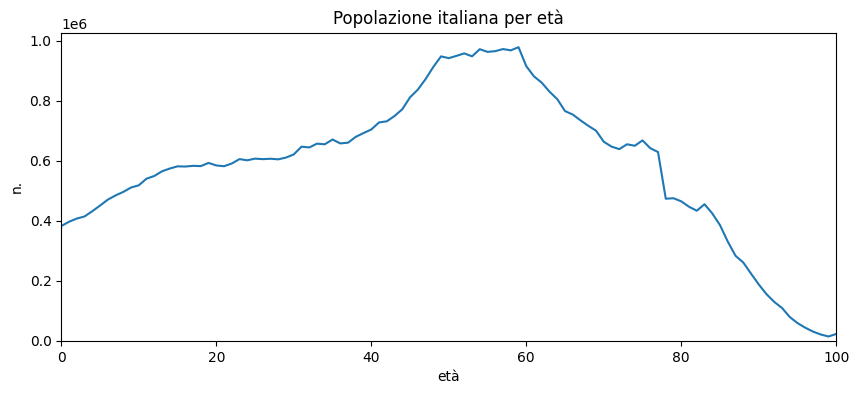

In [38]:
plt.figure(figsize=(10, 4))
plt.plot(df['anni'], df['Value'],linestyle='-')
plt.title('Popolazione italiana per età')
plt.xlabel('età')
plt.ylabel('n.')
plt.ylim(0)
plt.xlim(0, 100)
plt.show()

In [39]:
df['Value_cum'] = df.Value.cumsum()
df['Value_perc'] = df.Value_cum/df.Value_cum.max()

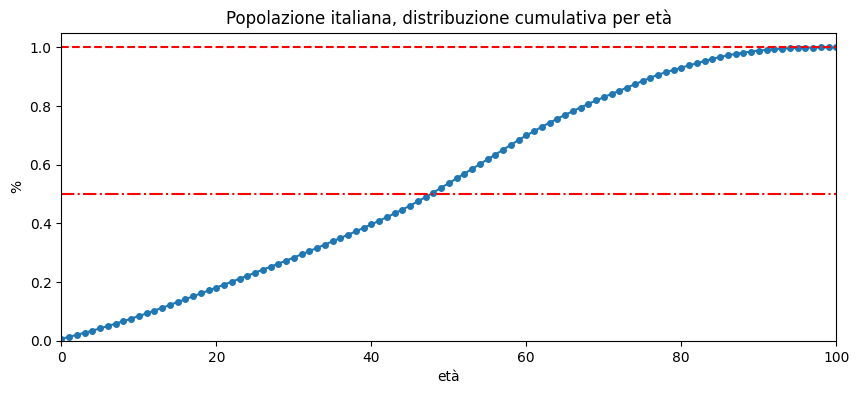

In [41]:
plt.figure(figsize=(10, 4))
plt.plot(df['anni'], df['Value_perc'], 'o', linestyle='-', markersize=4)
plt.plot((0, 100), (1,1), color='red', linestyle='--')
plt.plot((0, 100), (.5,.5), color='red', linestyle='-.')
plt.title('Popolazione italiana, distribuzione cumulativa per età')
plt.xlabel('età')
plt.ylabel('%')
plt.ylim(0)
plt.xlim(0, 100)
plt.show()

Per trasformare la distribuzione discreta in continua, usiamo la funzione [```interp1d```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html).

Possiamo facilmente invertire la distribuzione cumulativa usando il campo ```Value_perc``` come asse $x$.

In [42]:
from scipy.interpolate import interp1d
interp_val = interp1d(df['anni'], df['Value'])
interp_cum_inv = interp1d(df['Value_perc'], df['anni'])

La mediana è semplicemente il 50° percentile della cumulativa:

In [47]:
median = interp_cum_inv(0.5)
print('median: {:.2f}y'.format(median))

median: 47.68y


La media si può calcolare come media pesata usando come pesi il numero di persone con una certa età.

In [48]:
avg = np.average(df['anni'], weights=df['Value'])
print('average: : {:.2f}y'.format(avg))

average: : 46.10y


La moda è semplicemente il valore a cui corrisponde il maggior numero di persone. Può essere calcolato solo come valore intero, visto il formato dei dati. 

In [50]:
mode = float(df.loc[df['Value'].idxmax()]['anni'])
print('mode: {:.0f}y'.format(mode))

mode: 59y


In [52]:
print('average: {:.2f}y, median: {:.2f}y, mode: {:.2f}y'.format(avg, median, mode))

average: 46.10y, median: 47.68y, mode: 59.00y


Possiamo riportare gli indicatodi sulla distribuzione

percentile: 5.00% 5.672322485478354
percentile: 10.00% 11.232986274689036
percentile: 25.00% 26.511614794197033
percentile: 75.00% 63.075004879569605
percentile: 90.00% 76.18045976557018
percentile: 95.00% 82.22229093090645


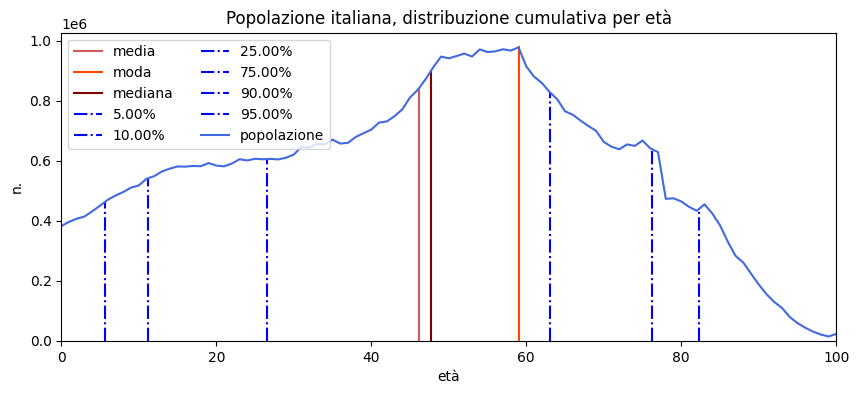

In [58]:
plt.figure(figsize=(10, 4))
plt.plot((avg, avg), (0, interp_val(avg)), linestyle='-', label='media', color='indianred')
plt.plot((mode, mode), (0, interp_val(mode)), linestyle='-', label='moda', color='orangered')
plt.plot((median, median), (0, interp_val(median)), linestyle='-', color='maroon', label='mediana')
for perc in [0.05, 0.1, 0.25, 0.75, 0.9, 0.95]:
    val = interp_cum(perc)
    print("percentile: {:.2%}".format(perc), val)
    plt.plot((val,val), (0,interp_val(val)), linestyle='-.', color='blue', label='{:.2%}'.format(perc))
plt.plot(df['anni'], df['Value'], linestyle='-', label='popolazione', color='royalblue')
plt.legend(loc='upper left', ncols=2)
plt.title('Popolazione italiana, distribuzione cumulativa per età')
plt.xlabel('età')
plt.ylabel('n.')
plt.ylim(0)
plt.xlim(0, 100)
plt.show()

## Spunti per esercizi

* Ripetere lo stesso grafico e la valutazione dei quantili per per alcune principali regioni o province italiane.
* Confrontare sullo stesso grafico le distribuzioni di età per alcune principali regioni o province italiane.
* Confrontare per Campania e Liguria a quel età corrisponde il 5% della popolazione più anziana